# 🧱🏭 **Training and Building of PVRE-MNIST Dataset**

**Source:** [Inducing Causal Structure for Interpretable Neural Networks]("https://arxiv.org/pdf/2112.00826.pdf")

## 📝 Notes:

* Input is a grid of $4$ images of mnist. 
* The $4$ input images are defined as $(I_{TL}, I_{TR}, I_{BL}, T_{BR})$
* It creates a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



## 📊👨🏻‍💻 **Splitting the train-test split based on the condition**

* PVR-MNIST is created such that a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



In [1]:
from imports import *

folder_path = 'pvr_mnist_dataset/images/'

In [2]:
# images = [[np.array(Image.open(os.path.join(folder_path,i)).convert('RGB')), int(*re.findall(r'\d+',i))] for i in tqdm(os.listdir(folder_path))]


# p(len(images))

In [3]:
# images

In [4]:
# images_, labels = zip(*images)

# # Convert to numpy arrays
# images_np = np.array(images_)
# labels_np = np.array(labels)

# # Save images and labels to .npy files
# np.save('images.npy', images_np)
# np.save('labels.npy', labels_np)

In [5]:
images = np.load('images.npy')
labels_index = np.load('labels.npy')

In [6]:
labels = np.load('pvr_mnist_dataset/labels/combined_labels.npy')

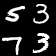

In [7]:
transforms.ToPILImage()(images[0])

The format of the image is like:

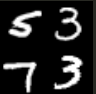

Meanwhile the label is in the format: array([5, 7, 3, 3]), i.e. $(i_{TL},i_{BL},i_{TR},i_{BR})$

In [8]:
list(labels[0])

[8, 5, 8, 5]

In [9]:
train_image, test_image, train_label, test_label = [], [], [], []


def filter(images, labels):
    for image, label_index in tqdm(zip(images, labels_index)):
        label = list(labels[label_index])
        if label[2] in {1,2,3} or label[1] in {4,5,6} or label[-1] in {0,7,8,9}:
            test_image.append(image)
            test_label.append(label)
        else:
            train_image.append(image)
            train_label.append(label)

    return train_image, test_image, train_label, test_label

In [10]:
train_image, test_image, train_label, test_label = filter(images, labels)

39984it [00:00, 359251.47it/s]

1000000it [00:01, 830490.29it/s]


In [11]:
# Meanwhile the label is in the format: array([5, 7, 3, 3]), i.e. $(i_{TL},i_{BL},i_{TR},i_{BR})$

def updated_labels(labels):

    updated_labels = []

    for label in tqdm(labels):
        if label[0] in {0,1,2,3}:
            updated_labels.append(label[2])
        elif label[1] in {4,5,6}:
            updated_labels.append(label[1])
        else:
            updated_labels.append(label[-1])
    
    return updated_labels

test_updated_labels = updated_labels(test_label)
train_updated_labels = updated_labels(train_label) 

100%|██████████| 294116/294116 [00:00<00:00, 6879925.46it/s]


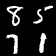

In [12]:
transforms.ToPILImage()(train_image[0])


In [13]:
train_updated_labels[0]

1

In [14]:

train_images = np.stack([np.array(transforms.ToPILImage()(image)) for image in tqdm(train_image)])
train_images = torch.tensor(train_images).float().reshape(-1, 3, 56, 56)
print(train_images.shape)

train_images


test_images = np.stack([np.array(transforms.ToPILImage()(image)) for image in tqdm(test_image)])
test_images = torch.tensor(test_images).float().reshape(-1, 3, 56, 56)
# test_images = test_images.repeat(1, 3, 1, 1)

test_images


100%|██████████| 294116/294116 [00:05<00:00, 53874.35it/s]


torch.Size([294116, 3, 56, 56])


100%|██████████| 705884/705884 [00:11<00:00, 59077.00it/s]


tensor([[[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 253., 135., 135.],
          [135.,   4.,   4.,  ...,   0.,   0.,   0.]],

         [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 208.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [ 16.,  38.,  38.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 184., 212., 212.]],

         [[212., 253., 253.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 253., 253., 253.],
          ...,
          [  0.,   0.,   0.,  ...,  12.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...

In [15]:
train_images.shape

torch.Size([294116, 3, 56, 56])

We will have to modify the labels based on the condition: 

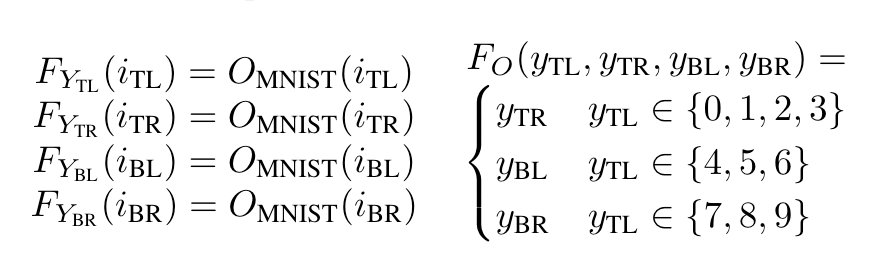

In [16]:
test_labels = torch.tensor(np.array(test_updated_labels)).long()
train_labels = torch.tensor(np.array(train_updated_labels)).long()

## 🚅🏋🏻‍♂️ **Training the ResNet on PVR-MNIST Dataset**

In [17]:
from transformers import ResNetForImageClassification, ResNetConfig
from imports import *

# ResNetConfig.num_labels = 10
resnet = ResNetForImageClassification(ResNetConfig(num_labels=10))
resnet.config

ResNetConfig {
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9"
  },
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "transformers_version": "4.36.2"
}

In [18]:
resnet

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [19]:
# Ensure the model is on the correct device
device = torch.device("mps")
print(device)
resnet = resnet.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 10

mps


In [20]:
# Normalization parameters
mean, std = 0.1307, 0.3081
train_images = (train_images - mean) / std  # Normalize images

# Hyperparameters
batch_size = 2000  # Define your batch size

for epoch in tqdm(range(num_epochs)):
    resnet.train()
    total_loss = 0

    # Manual batching
    for i in tqdm(range(0, len(train_images), batch_size)):
        # Prepare batch
        data = train_images[i:i+batch_size].to(device)
        target = train_labels[i:i+batch_size].to(device)

        # Training step
        optimizer.zero_grad()
        output = resnet(data)
        logits = output.logits 
        loss = criterion(logits, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    num_batches = len(train_images) // batch_size
    print(f'Epoch {epoch+1}, Loss: {total_loss/num_batches}')

 10%|█         | 1/10 [1:08:23<10:15:35, 4103.92s/it]

Epoch 1, Loss: 0.8063449486583268


 20%|██        | 2/10 [2:56:06<12:12:10, 5491.36s/it]

Epoch 2, Loss: 0.20522432689409273


 30%|███       | 3/10 [4:28:34<10:43:40, 5517.16s/it]

Epoch 3, Loss: 0.08947508933567473


 40%|████      | 4/10 [6:10:34<9:35:30, 5755.12s/it] 

Epoch 4, Loss: 0.05997774689173212


 50%|█████     | 5/10 [7:16:39<7:05:48, 5109.80s/it]

Epoch 5, Loss: 0.039158646321418335


 60%|██████    | 6/10 [8:29:42<5:24:10, 4862.52s/it]

Epoch 6, Loss: 0.03122019661324365


 70%|███████   | 7/10 [9:43:09<3:55:40, 4713.51s/it]

Epoch 7, Loss: 0.021508796469603037


 80%|████████  | 8/10 [11:41:47<3:02:38, 5479.07s/it]

Epoch 8, Loss: 0.016559970275289854


 90%|█████████ | 9/10 [12:54:00<1:25:20, 5120.85s/it]

Epoch 9, Loss: 0.013703895172066227


100%|██████████| 10/10 [14:16:39<00:00, 5139.99s/it] 

Epoch 10, Loss: 0.020385133935658096


In [21]:
resnet.save_pretrained('resnet_pvr_model')

In [22]:
torch.save(resnet.state_dict(), 'resnet_pvr_model/resnet_state_dict.pth')

In [23]:
resnet_trained = ResNetForImageClassification.from_pretrained('resnet_pvr_model')

In [37]:
correct = 0
total = 0
device = torch.device("cpu")
resnet_trained.eval()

with torch.no_grad():
    for images, labels in tqdm(zip(test_images, test_labels)):
        # Move tensors to the configured device
        images = images.unsqueeze(0)
        images = images.to(device)
        labels = torch.tensor([labels]).to(device)
        
        # Forward pass: compute the model output
        outputs = resnet_trained(images)
        
        # Get the predictions
        _, predicted = torch.max(outputs.logits, 1)
        
        # Update the counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the training images: {accuracy:.2f}%')


705884it [2:48:09, 69.96it/s] 

Accuracy of the model on the training images: 17.55%
